In [64]:
#import the following libraries:import numpy as np
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [9]:

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df= pd.read_csv(boston_url)
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


Task 4: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

    Generate the following and explain your findings:
    For the "Median value of owner-occupied homes" provide a boxplot
    Provide a  bar plot for the Charles river variable
    Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
    Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
    Create a histogram for the pupil to teacher ratio variable

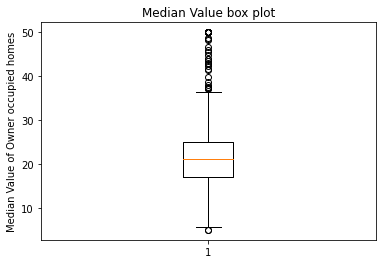

In [12]:
# 1) For the "Median value of owner-occupied homes" provide a boxplot
plt.boxplot(boston_df['MEDV'])
plt.title("Median Value box plot")
plt.ylabel("Median Value of Owner occupied homes")
plt.show()

with this answer 1, we can conclude that median value of owner occupied homes is slightly more than $20,000.

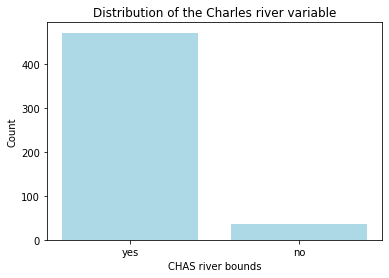

In [29]:
# 2) Provide a  bar plot for the Charles river variable
bar_plot= plt.bar(['yes', 'no'], boston_df['CHAS'].value_counts(), color= 'lightblue')
bar_plot=plt.title("Distribution of the Charles river variable")
bar_plot= plt.xlabel("CHAS river bounds")
bar_plt= plt.ylabel("Count")

with answer 2 we can conclude that count more than 400 is corresponding to yes and less than 100 to no. Thus, we can say that most of the houses are surrounded by river

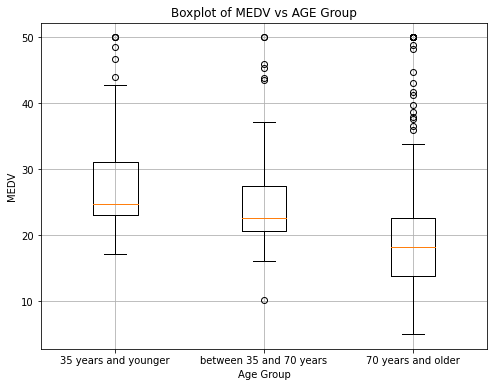

In [31]:
# 3) Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# Discretize the AGE variable into three groups
age_bins = [0, 35, 70, float('inf')]
age_labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([boston_df[boston_df['AGE Group'] == label]['MEDV'] for label in age_labels], labels=age_labels)
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.title('Boxplot of MEDV vs AGE Group')
plt.grid(True)
plt.show()


with the above box plots we can conclude that the median value for the house owners of age 35 and younger is highest and that is lowest for the age group 
of 70 years and older.

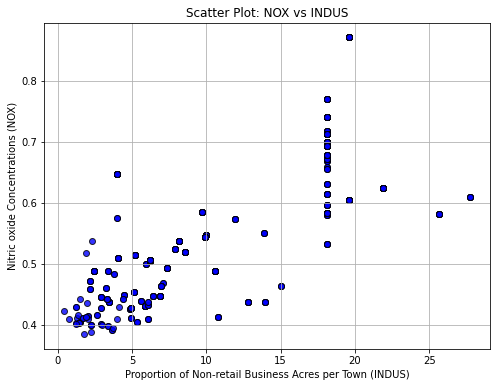

In [32]:
# 4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.8, c='blue', edgecolors='k')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric oxide Concentrations (NOX)')
plt.title('Scatter Plot: NOX vs INDUS')
plt.grid(True)
plt.show()



Based on the scatter plot, we can observe a significant positive correlation between Nitric Oxide Concentrations and the Proportion of Non-Retail Business Acres per Town. However, it's worth noting that there are some data points around the level of 20 Proportion of Non-Retail Business Acres per Town that exhibit varying Nitric Oxide Concentrations.

Text(0.5, 1.0, 'Histogram of PTRATIO')

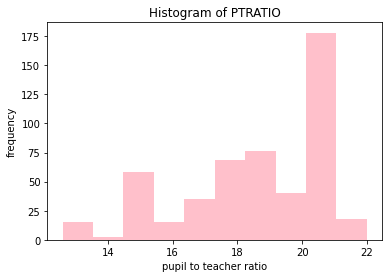

In [40]:
# 5) Create a histogram for the pupil to teacher ratio variable
plt.hist(boston_df['PTRATIO'], color= 'pink')
plt.xlabel("pupil to teacher ratio")
plt.ylabel("frequency")
plt.title("Histogram of PTRATIO")

we can say that data is left skewed as it is forming a left skewed (normal distribution curve)

Task 5: Use the appropriate tests to answer the questions provided.
For each of the following questions;

1- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
2- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
3- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
4- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.

In [68]:
# 1- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# ASSUMPTION :
    # P Value =0.05
    # H0: There is no significant difference in median value of houses bounded by the Charles river
    # H1: There is a significant difference in median value of houses bounded by the Charles river
# from statsmodels import ttest_ind
alpha =0.05 #significance level

t_stat,p_value=scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)


print("t_stat: ",t_stat)
print("p_value: ", p_value)

if(p_value<alpha):
    print("Reject the H0 null hipothesis")
else:
    print("do not reject null hypothesis")

t_stat:  3.996437466090509
p_value:  7.390623170519905e-05
Reject the H0 null hipothises


since the p value 7.390623170519905e-05< 0.05 i.e. our significance level, thus we have enough evidence to say h1 is true to reject the null hypothesis.

In [75]:
# 2- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# H0: there is a difference in median values of houses
# H1: there is no difference in median values of houses
from statsmodels.formula.api import ols
# Fit ANOVA model
formula = 'MEDV ~ C(AGE)'
model = ols(formula, data=boston_df).fit()

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model)
print(anova_table)

             df        sum_sq   mean_sq         F   PR(>F)
C(AGE)    355.0  29884.038419  84.18039  0.984009  0.55397
Residual  150.0  12832.256996  85.54838       NaN      NaN


Here, p_value=0.55397 which is greater than alpha thus we will accept null hypothesis.

In [77]:
# 3- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
# (Pearson Correlation)
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# H0: There is no relationship between nitric oxide concentrations and proportion or non retail business acres per town.
# H1: There is relationship between nitric oxide concentrations and proportion or non retail business acres per town.

# Significance level (alpha)
alpha = 0.05

# Check if the p-value is greater than alpha to determine the result

print("correlation_coefficient= ", correlation_coefficient)
print("p_value= ", p_value)
if p_value > alpha:
    print("Fail to reject the null hypothesis. There is no significant relationship between NOX and INDUS.")
else:
    print("Reject the null hypothesis. There is a significant relationship between NOX and INDUS.")


correlation_coefficient=  0.7636514469209157
p_value=  7.91336106123623e-98
Reject the null hypothesis. There is a significant relationship between NOX and INDUS.


In [78]:
# 4- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 
# (Regression analysis)

# Variables X,Y
X = boston_df['DIS']  # Additional weighted distance to the five Boston employment centres
X = sm.add_constant(X)  # Add a constant term for the intercept
y = boston_df['MEDV']  # Median value of owner-occupied homes

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        22:57:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

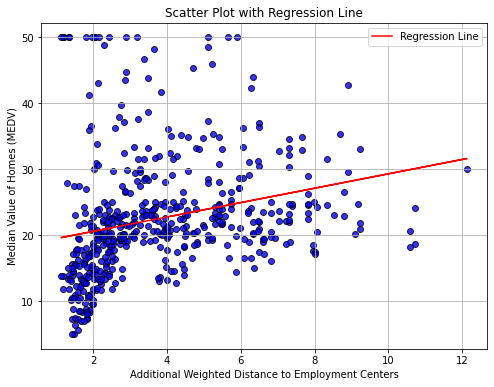

In [80]:
# plotting the regression line:

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['DIS'], boston_df['MEDV'], alpha=0.8, c='blue', edgecolors='k')
plt.xlabel('Additional Weighted Distance to Employment Centers')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Scatter Plot with Regression Line')
plt.grid(True)

# Plot the regression line
plt.plot(X['DIS'], model.predict(X), c='red', label='Regression Line')

# Show the legend
plt.legend()

The regression analysis indicates that the impact of an additional weighted distance to the employment centers on the median value of homes is statistically significant. The p-value associated with the coefficient of the distance variable suggests that this relationship is unlikely to be due to random chance.